<a href="https://colab.research.google.com/github/VikaSvyat/DI_Bootcamp/blob/main/colab/DataUnderstanding_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data Science Job Salaries.zip to Data Science Job Salaries.zip


In [2]:
!unzip "Data Science Job Salaries.zip"
!ls

Archive:  Data Science Job Salaries.zip
  inflating: ds_salaries.csv         
'Data Science Job Salaries.zip'   ds_salaries.csv   sample_data


In [3]:
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing tools: StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# sklearn imputer: SimpleImputer
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
print(df.shape)
print(df.info())
print(df.describe())

(607, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   30

*Identify and differentiate between quantitative and qualitative
 data within the dataset*

 ```
 1   work_year           qualitative
 2   experience_level    qualitative
 3   employment_type     qualitative
 4   job_title           qualitative
 5   salary              quantitative
 6   salary_currency     quantitative
 7   salary_in_usd       quantitative
 8   employee_residence  qualitative
 9   remote_ratio        ?
 10  company_location    qualitative
 11  company_size        quantitative
```



*Preprocess the data by handling missing values and removing duplicates if needed*

In [22]:
df.isnull().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [7]:
print(f"Duplicate rows: {df.duplicated().sum()}")

duplicated_df = df[df.duplicated(keep=False)]
duplicated_df

Duplicate rows: 0


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [8]:
df_d = df.drop_duplicates()
df_d.shape

(607, 12)

After preprocessing steps, I found that the dataset without missing values or duplicates

*Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.*


In [16]:
salary_stats = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median'])#.reset_index()

print(salary_stats)


                           mean    median
experience_level                         
EN                 61643.318182   56500.0
EX                199392.038462  171437.5
MI                 87996.056338   76940.0
SE                138617.292857  135500.0


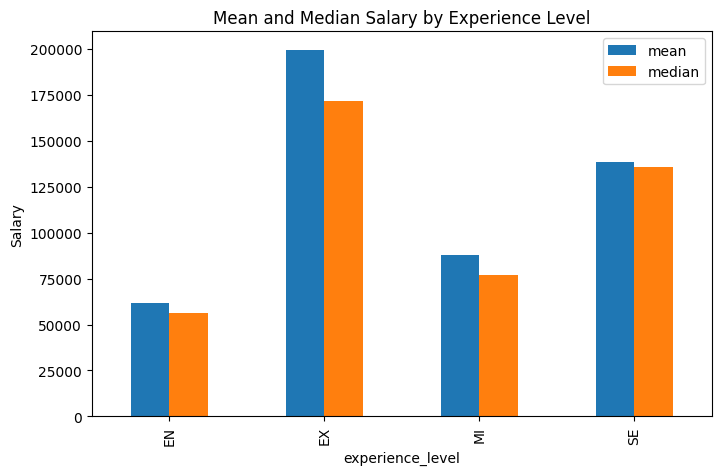

In [17]:

salary_stats.plot(
    #x='experience_level',
    y=['mean', 'median'],
    kind='bar',
    figsize=(8,5)
)
plt.ylabel('Salary in USD')
plt.title('Mean and Median Salary by Experience Level')
plt.show()


*Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.*

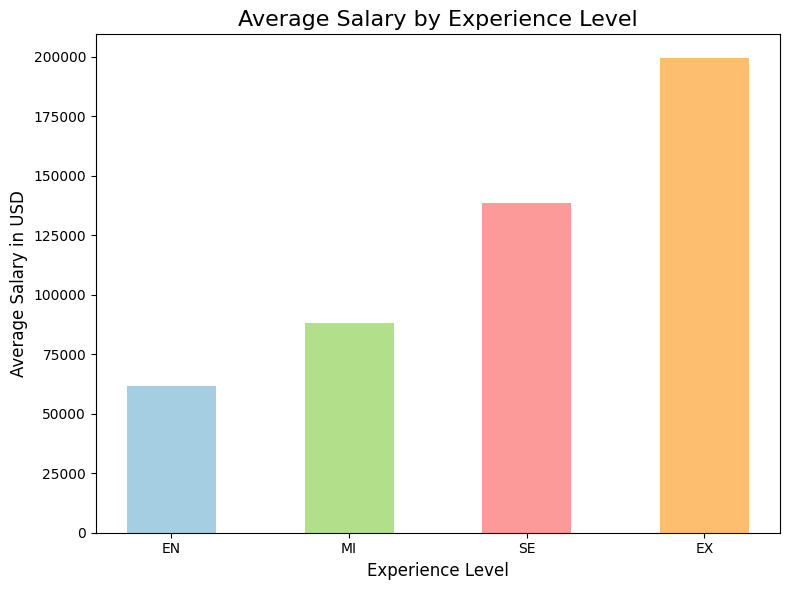

In [21]:
#group by experience_level
salary_stats = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
#sort by mean salary for readability
salary_stats = salary_stats.sort_values(by='salary_in_usd', ascending=True)

# Set figure size
plt.figure(figsize=(8,6))

# Plot bar chart
bars = plt.bar(
    salary_stats['experience_level'],
    salary_stats['salary_in_usd'],
    color=['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f'],
    width=0.5
)

# Add title and axis labels
plt.title('Average Salary by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.tight_layout()
plt.show()
